
FIRST 5 ROWS:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown  5.0   may     261.0       1.0   -1.0       0.0  unknown  no  
1  unknown  5.0   may     151.0       1.0   -1.0       0.0  unknown  no  
2  unknown  5.0   may      76.0       1.0   -1.0       0.0  unknown  no  
3  unknown  5.0   may      92.0       1.0   -1.0       0.0  unknown  no  
4  unknown  5.0   may     198.0       1.0   -1.0       0.0  unknown  no  

DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10344 entries, 0 to 10343
Data col

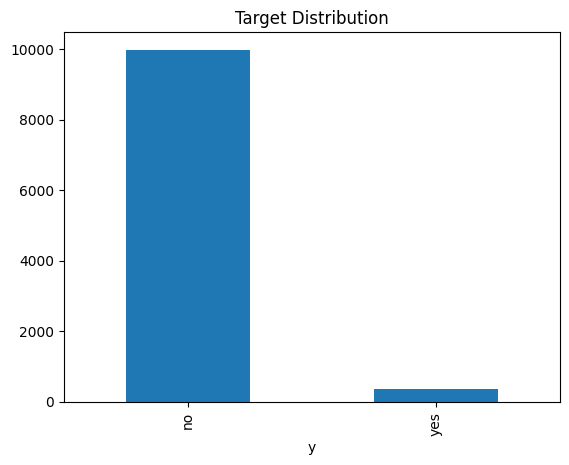

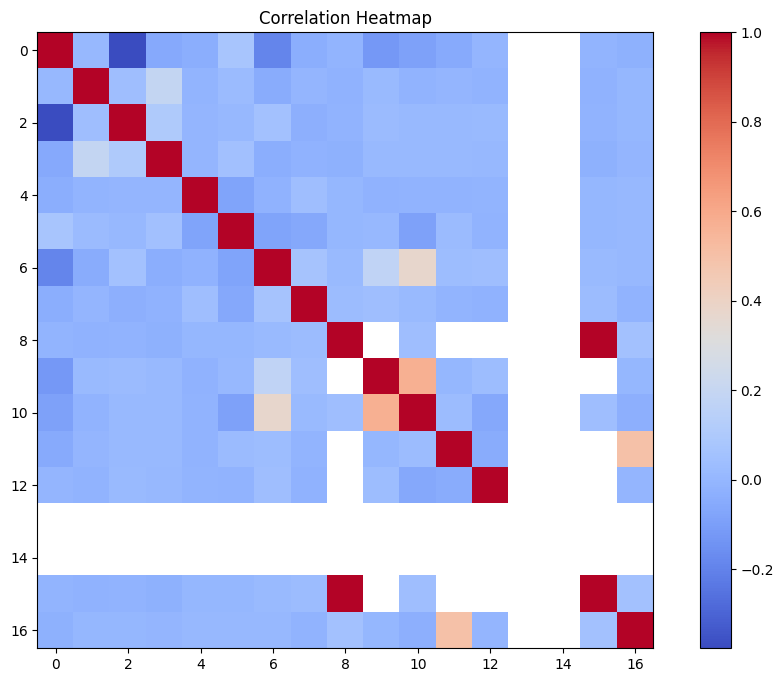

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("bank-full.csv", sep=';')

print("\nFIRST 5 ROWS:")
print(df.head())

print("\nDATA INFO:")
print(df.info())

print("\nMISSING VALUES:")
print(df.isnull().sum())

print("\nSUMMARY STATISTICS:")
print(df.describe(include='all'))

print("\nTARGET DISTRIBUTION:")
print(df["y"].value_counts())

df["y"].value_counts().plot(kind="bar", title="Target Distribution")
plt.show()
df_enc = df.copy()
for col in df_enc.columns:
    if df_enc[col].dtype == "object":
        df_enc[col] = df_enc[col].astype("category").cat.codes

plt.figure(figsize=(12,8))
plt.imshow(df_enc.corr(), cmap="coolwarm")
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("bank-full.csv", sep=';')
# shuffle data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Encode categorical variables
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = LabelEncoder().fit_transform(df[col])

# Split features and target
X = df.drop("y", axis=1).values
y = df["y"].values
split = int(0.8 * len(df))

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


TRAIN SHAPE: (8275, 16)
TEST SHAPE : (2069, 16)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("bank-full.csv", sep=';')

# Encode categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split features & target
X = df.drop("y", axis=1).values
y = df["y"].values

split_index = int(0.8 * len(df))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


class LogisticRegressionScratch:
    def __init__(self, lr=0.1, epochs=6000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        n, d = X.shape
        self.w = np.zeros(d)
        self.b = 0

        for _ in range(self.epochs):
            z = X @ self.w + self.b
            p = sigmoid(z)

            dw = (X.T @ (p - y)) / n
            db = np.sum(p - y) / n

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        return sigmoid(X @ self.w + self.b)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


# Train model
model = LogisticRegressionScratch(lr=0.1, epochs=6000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nUnique Predictions:", np.unique(y_pred))
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, FP, TN, FN


TP, FP, TN, FN = confusion_matrix(y_test, y_pred)

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP + 1e-9)
recall = TP / (TP + FN + 1e-9)
f1 = 2 * precision * recall / (precision + recall + 1e-9)

print("\nCONFUSION MATRIX")
print(f"TP = {TP}, FP = {FP}")
print(f"TN = {TN}, FN = {FN}")

print("\nMETRICS")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


Train shape: (36168, 16)
Test shape : (9043, 16)

Unique Predictions: [0 1]

CONFUSION MATRIX
TP = 257, FP = 140
TN = 7840, FN = 806

METRICS
Accuracy : 0.895388698440783
Precision: 0.6473551637263291
Recall   : 0.24176857949177633
F1 Score : 0.35205479412410867
